# 1. Configuração Inicial

In [10]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 2. Definição dos Caminhos de Dados

In [11]:
import os
path_input_1 = os.path.join(os.getcwd(),  "sample_data", "machine_type_1", "id_00")
path_input_2 = os.path.join(os.getcwd(),  "mtsa", "examples", "sample_data", "machine_type_1", "id_00")

path_input_fan_id_00 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "fan", "id_00")
path_input_fan_id_02 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "fan", "id_02")
path_input_fan_id_04 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "fan", "id_04")
path_input_fan_id_06 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "fan", "id_06")

path_input_pump_id_00 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "pump", "id_00")
path_input_pump_id_02 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "pump", "id_02")
path_input_pump_id_04 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "pump", "id_04")
path_input_pump_id_06 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "pump", "id_06")

path_input_slider_id_00 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "slider", "id_00")
path_input_slider_id_02 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "slider", "id_02")
path_input_slider_id_04 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "slider", "id_04")
path_input_slider_id_06 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "slider", "id_06")

path_input_valve_id_00 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "valve", "id_00")
path_input_valve_id_02 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "valve", "id_02")
path_input_valve_id_04 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "valve", "id_04")
path_input_valve_id_06 = os.path.join(os.getcwd(),  "..", "..", "MIMII", "valve", "id_06")

In [12]:
import sys
sys.path.append("..")

# 3. Importação de Módulos Personalizados

In [13]:
from mtsa import calculate_aucroc

# 4. IForest Model: Fan Id 06

In [14]:
from mtsa import files_train_test_split
#path_input_1 = '/data/MIMII/fan/id_00/'
X_train, X_test, y_train, y_test = files_train_test_split(path_input_fan_id_06)
#if(len(y_train) == 0): 
#   X_train, X_test, y_train, y_test = files_train_test_split(path_input_2)
print(f"X_train: {X_train}")
print(f"y_train: {y_train}")

X_train: ['/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000982.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000771.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000020.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000617.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000200.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000281.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000287.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000351.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000414.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000408.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000421.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000844.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000462.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000677.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000375.wav'
 '/data/joao/mtsa/../../MIMII/fan/id_06/normal/00000901.wav'
 '/data/joao/mt

In [15]:
print(f"Conjunto de Treinamento: {X_train.shape}, Labels: {y_train.shape}")
print(f"Conjunto de Teste: {X_test.shape}, Labels: {y_test.shape}")

Conjunto de Treinamento: (654,), Labels: (654,)
Conjunto de Teste: (722,), Labels: (722,)


In [16]:
from mtsa import IForest

model_isolationforest1 = IForest(n_estimators=50, contamination=0.01, max_samples=128, max_features=1.0)
model_isolationforest1.model

Pipeline(steps=[('wav2array', Wav2Array()),
                ('array2mfcc', Array2Mfcc(sampling_rate=None)),
                ('features',
                 FeatureUnion(transformer_list=[('M',
                                                 MagnitudeMeanFeatureMfcc()),
                                                ('S',
                                                 MagnitudeStdFeatureMfcc()),
                                                ('C',
                                                 CorrelationFeatureMfcc())])),
                ('final_model',
                 IsolationForest(contamination=0.01, max_samples=128,
                                 n_estimators=50))])

In [17]:
import time
import pandas as pd
from mtsa import IForest

results = []

def train_and_evaluate_model(model, model_name, X_train, X_test, y_train, y_test):
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    training_duration = end_time - start_time
    auc = calculate_aucroc(model, X_test, y_test)
    
    print(f"Tempo de Treinamento: {training_duration:.2f} segundos, AUC-ROC: {auc:.4f}, modelo: {model_name}")
    
    results.append({
        "model_name": model_name,
        "n_estimators": model.n_estimators,
        "contamination": model.contamination,
        "max_samples": model.max_samples,
        "max_features": model.max_features,
        "training_time": training_duration,
        "auc_roc": auc
    })

folder_path = '/data/joao/mtsa/experiments'

if not os.path.exists(folder_path):
    os.makedirs(folder_path)

train_and_evaluate_model(model_isolationforest1, "IsolationForest_50_estimators_128_samples", X_train, X_test, y_train, y_test)

model_isolationforest2 = IForest(n_estimators=50, contamination=0.01, max_samples=256, max_features=1.0)
train_and_evaluate_model(model_isolationforest2, "IsolationForest_50_estimators_256_samples", X_train, X_test, y_train, y_test)

model_isolationforest3 = IForest(n_estimators=100, contamination=0.01, max_samples=256, max_features=1.0)
train_and_evaluate_model(model_isolationforest3, "IsolationForest_100_estimators_256_samples", X_train, X_test, y_train, y_test)

model_isolationforest4 = IForest(n_estimators=100, contamination=0.01, max_samples=512, max_features=1.0)
train_and_evaluate_model(model_isolationforest4, "IsolationForest_100_estimators_512_samples", X_train, X_test, y_train, y_test)

model_isolationforest9 = IForest(n_estimators=100, contamination=0.05, max_samples=256, max_features=1.0)
train_and_evaluate_model(model_isolationforest9, "IsolationForest_100_estimators_256_samples_0.05_contamination", X_train, X_test, y_train, y_test)

model_isolationforest10 = IForest(n_estimators=100, contamination=0.05, max_samples=512, max_features=1.0)
train_and_evaluate_model(model_isolationforest10, "IsolationForest_100_estimators_512_samples_0.05_contamination", X_train, X_test, y_train, y_test)

model_isolationforest11 = IForest(n_estimators=100, contamination=0.05, max_samples=512, max_features=0.75)
train_and_evaluate_model(model_isolationforest11, "IsolationForest_100_estimators_512_samples_0.05_contamination_0.75_max_features", X_train, X_test, y_train, y_test)

model_isolationforest12 = IForest(n_estimators=100, contamination=0.05, max_samples=512, max_features=0.5)
train_and_evaluate_model(model_isolationforest12, "IsolationForest_100_estimators_512_samples_0.05_contamination_0.5_max_features", X_train, X_test, y_train, y_test)

model_isolationforest5 = IForest(n_estimators=200, contamination=0.01, max_samples=256, max_features=1.0)
train_and_evaluate_model(model_isolationforest5, "IsolationForest_200_estimators_256_samples", X_train, X_test, y_train, y_test)

model_isolationforest6 = IForest(n_estimators=200, contamination=0.01, max_samples=512, max_features=1.0)
train_and_evaluate_model(model_isolationforest6, "IsolationForest_200_estimators_512_samples", X_train, X_test, y_train, y_test)

model_isolationforest7 = IForest(n_estimators=500, contamination=0.01, max_samples=256, max_features=1.0)
train_and_evaluate_model(model_isolationforest7, "IsolationForest_500_estimators_256_samples", X_train, X_test, y_train, y_test)

model_isolationforest8 = IForest(n_estimators=500, contamination=0.01, max_samples=512, max_features=1.0)
train_and_evaluate_model(model_isolationforest8, "IsolationForest_500_estimators_512_samples", X_train, X_test, y_train, y_test)

df_results = pd.DataFrame(results)

file_path = os.path.join(folder_path, 'isolationforest_Fan_id_06_hyperparameter_test.csv')
df_results.to_csv(file_path, index=False)

print(f"Resultados salvos em {file_path}")

KeyboardInterrupt: 

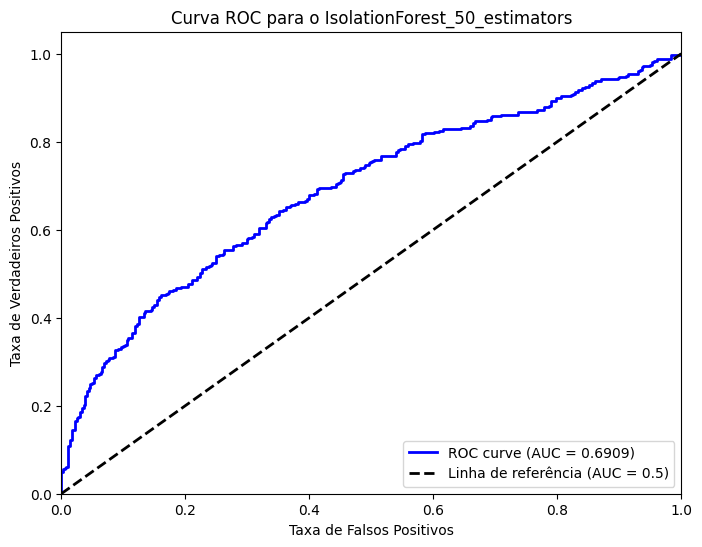

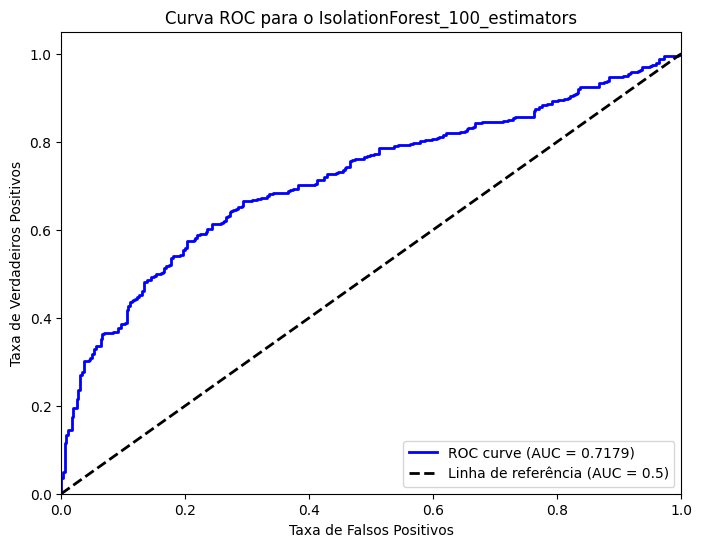

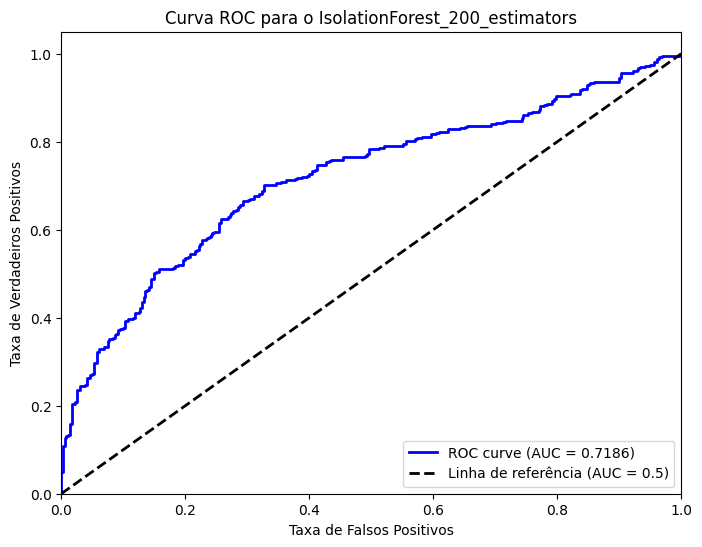

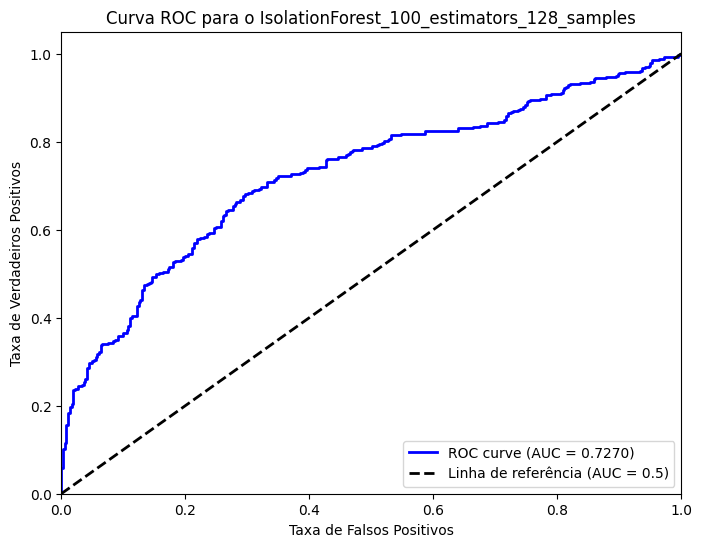

In [10]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(model, X_test, y_test, model_name):
    y_pred_prob = model.score_samples(X_test) 

    fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='black', lw=2, linestyle='--', label='Linha de referência (AUC = 0.5)')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Taxa de Falsos Positivos')
    plt.ylabel('Taxa de Verdadeiros Positivos')
    plt.title(f'Curva ROC para o {model_name}')
    plt.legend(loc='lower right')
    plt.show()

plot_roc_curve(model_isolationforest1, X_test, y_test, "IsolationForest_50_estimators")
plot_roc_curve(model_isolationforest2, X_test, y_test, "IsolationForest_100_estimators")
plot_roc_curve(model_isolationforest3, X_test, y_test, "IsolationForest_200_estimators")
plot_roc_curve(model_isolationforest4, X_test, y_test, "IsolationForest_100_estimators_128_samples")


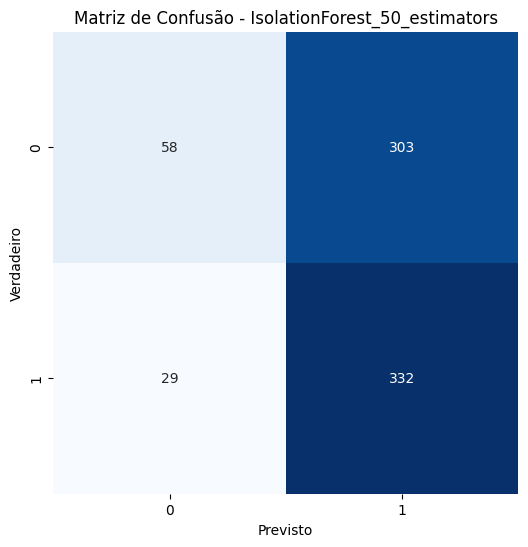

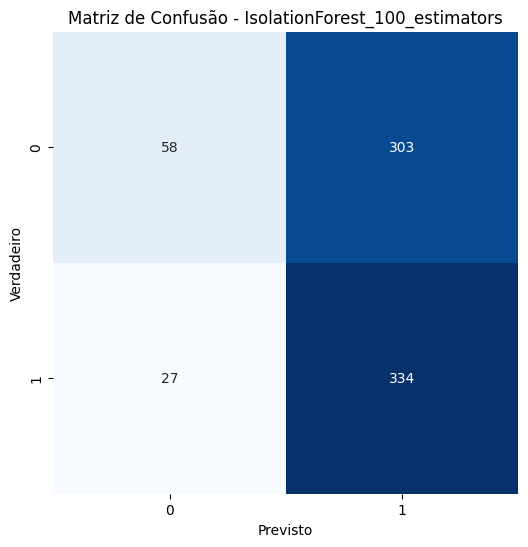

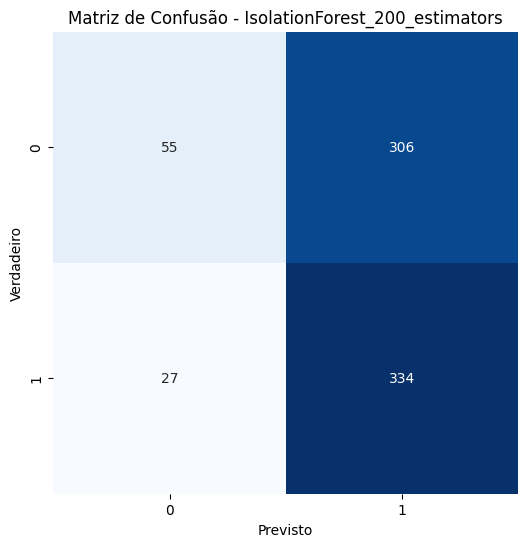

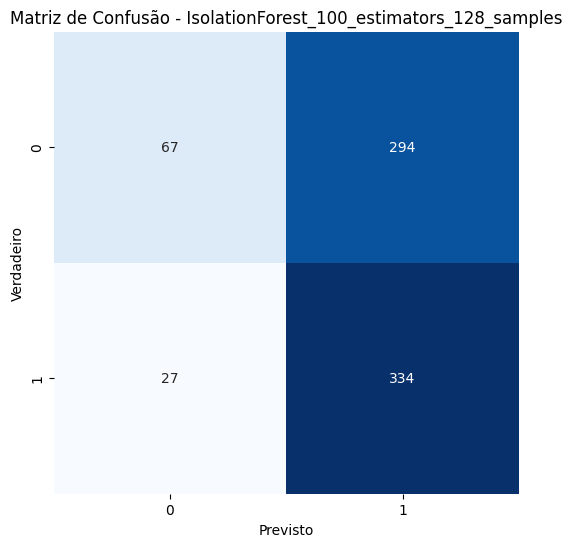

In [11]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Matriz de Confusão - {model_name}')
    plt.xlabel('Previsto')
    plt.ylabel('Verdadeiro')
    plt.show()

plot_confusion_matrix(model_isolationforest1, X_test, y_test, "IsolationForest_50_estimators")
plot_confusion_matrix(model_isolationforest2, X_test, y_test, "IsolationForest_100_estimators")
plot_confusion_matrix(model_isolationforest3, X_test, y_test, "IsolationForest_200_estimators")
plot_confusion_matrix(model_isolationforest4, X_test, y_test, "IsolationForest_100_estimators_128_samples")
